# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_df = pd.merge(mouse_metadata,study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
merge_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice. #249
merge_mouse_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_mouse_df[merge_mouse_df.duplicated()]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_mouse_df.drop(index = 909)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
check_duplicate_rows = clean_mouse_df[clean_mouse_df.duplicated()]
check_duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].nunique()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_STD = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_SEM = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_results = pd.DataFrame({
        "Mean Tumor Volume"      : tumor_mean,
        "Median Tumor Volume"    : tumor_median,
        "Tumor Volume Variance"  : tumor_variance,
        "Tumor Volume Std. Dev." : tumor_STD,
        "Tumor Volume Std. Err." : tumor_SEM,   
})

stat_results


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

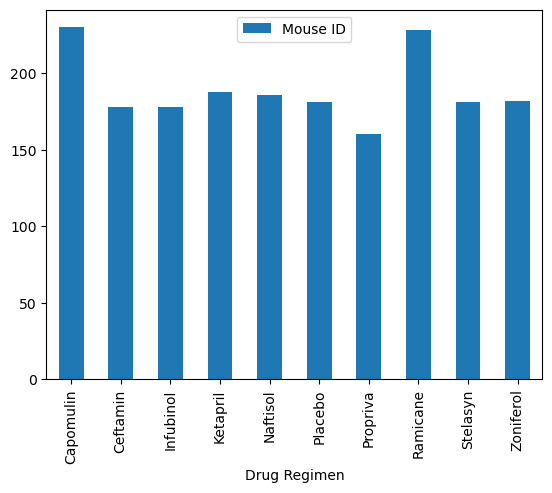

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_mouse_df.groupby(["Drug Regimen"])
drug_regimen_df = pd.DataFrame(drug_regimen["Mouse ID"].count())
drug_regimen_df.plot(kind = "bar")


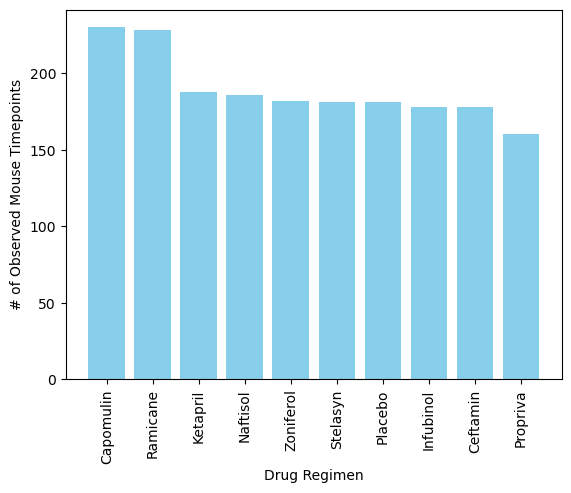

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_counts = clean_mouse_df["Drug Regimen"].value_counts().tolist()
x_axis = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

plt.bar(x_axis, mouse_counts, color="skyblue", align='center', alpha=1)
plt.xticks(x_axis, rotation = 'vertical')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

<Axes: ylabel='count'>

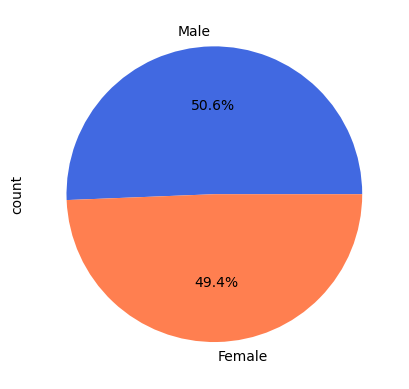

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Assuming clean_combined_mouse_trial is your DataFrame
gender_distribution = clean_mouse_df["Sex"].value_counts()

# Plotting a pie chart
gender_distribution.plot(kind="pie", autopct='%1.1f%%', colors=['royalblue', 'coral'], startangle=0)


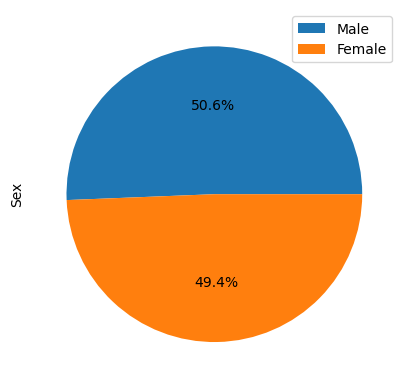

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.legend(labels=gender_distribution.index, loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

bigfour = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]             

# Start by getting the last (greatest) timepoint for each mouse
TimePointMax = bigfour.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

bigFourMerge = pd.merge(bigfour, TimePointMax, on = ["Timepoint" , "Mouse ID"])
bigFourMerge = bigFourMerge[[ "Mouse ID", "Drug Regimen" , "Tumor Volume (mm3)" , "Timepoint"]]
bigFourMerge


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,k403,Ramicane,22.050126,45
1,s185,Capomulin,23.343598,45
2,x401,Capomulin,28.484033,45
3,m601,Capomulin,28.430964,45
4,g791,Ramicane,29.128472,45
...,...,...,...,...
95,x822,Ceftamin,61.386660,45
96,y163,Infubinol,67.685569,45
97,y769,Ceftamin,68.594745,45
98,y865,Ceftamin,64.729837,45


In [38]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    treatment_df = bigFourMerge.loc[bigFourMerge["Drug Regimen"]==treatment,'Tumor Volume (mm3)']
    tumor_volume.append(treatment_df)
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    IQR = upperQ - lowerQ
    lowerBound=lowerQ-(1.5*IQR)
    upperBound=upperQ+(1.5*IQR)

# Determine outliers using upper and lower bounds
    outliers=treatment_df[(treatment_df<lowerBound)|(treatment_df>upperBound)]

Capomulin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


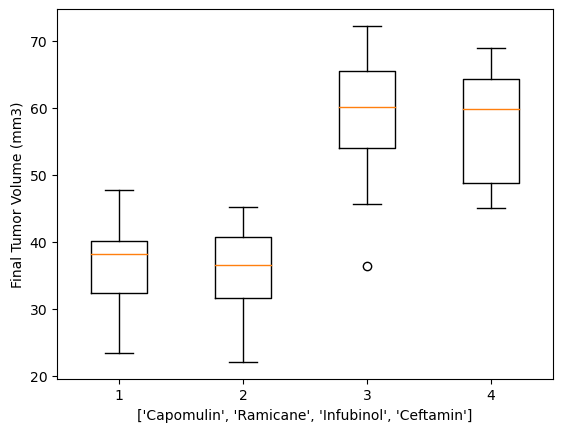

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume)
plt.xlabel(treatments)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of mouse x401')

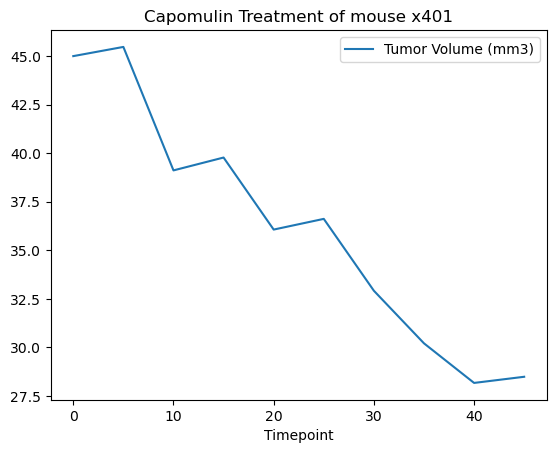

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

CapLine = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "x401"]
CapLine.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")
plt.title('Capomulin Treatment of mouse x401')

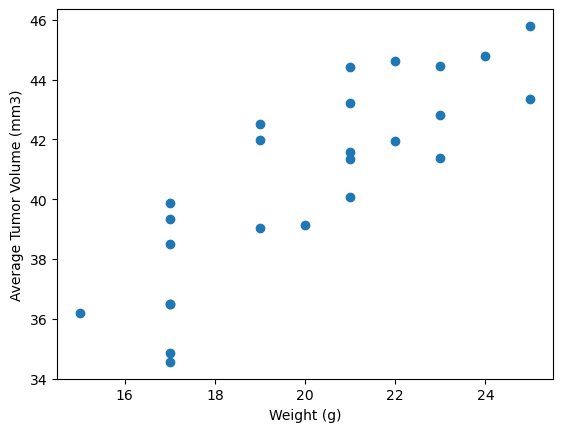

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#ran out of time, revist hw in future

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


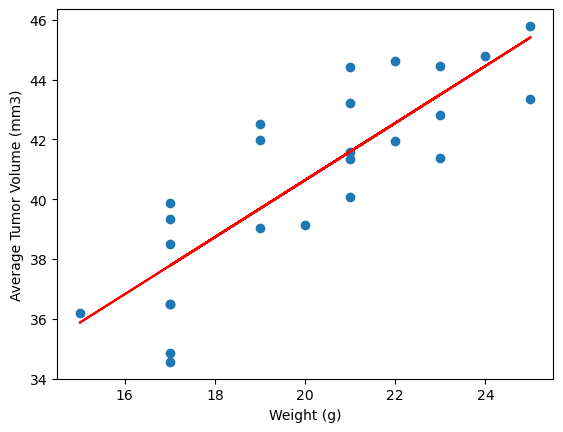

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
